In [1]:
#Hauss method
import numpy as np
import time

n = int(input())
A = np.random.rand(n, n)
f = np.random.rand(n)
A1 = A.copy()
f1 = f.copy()
for i in range(n):
    for j in range(n):
        if i != j:
            A[i][i] += A[i][j] 

linalg_time = time.time()
print()
print("LINALG")
print()
x1 = np.linalg.solve(A,f)
linalg_time = time.time() - linalg_time
for i in range(n):
    print(x1[i])

my_time = time.time()
for k in range(n):
        for j in range(k + 1, n):
            A[k, j] = A[k, j] / A[k, k]
        f[k] /= A[k][k]    
        for i in range(k + 1, n):
            for j in range(k + 1, n):
                A[i][j] = A[i][j] - A[i][k] * A[k][j]
            f[i] = f[i] - A[i][k] * f[k]
            A[i][k] = 0
x = np.zeros(n)
for i in range(n - 1, -1, -1):
    x[i] = f[i]
    for j in range(i + 1, n):
        x[i] -= A[i][j] * x[j]
my_time = time.time() - my_time
print()
print("MY SOLUTION")
print()
for i in range(n):
    print(x[i])
print()
print("MY TIME:", my_time)
print("LINALG TIME", linalg_time)


100

LINALG

0.0010059564081625293
0.015588147556762738
0.01158693384492293
0.01102694995135447
0.004018536891162806
0.010367095175733346
0.007158310656934654
-0.00441094468740604
0.00955836045578493
0.013893316331726527
0.008827087626064288
0.010883694376436246
0.00048098648308511556
-0.004808166674464593
-0.00014664692129342353
-0.003861481492861216
-0.0015844304769636812
-0.0038525860892493027
-0.00469005084615929
-0.0015295966510969828
0.007330182568413948
0.00301457134987946
0.008086841442699184
0.01598593159849692
-0.002037680395700035
0.012897070410213875
0.010106148777551435
0.009845461899949403
0.015473045320206618
0.012708924716726806
0.004905668578554303
0.007113508961829796
0.004367713016214681
0.008209670159324908
0.0012150915611231342
0.0019043595202183972
0.008541962118748575
0.003253143460973397
0.008465254327155168
0.008023764176120834
0.011109604728512438
-4.805363601797721e-05
0.01591600317529764
0.0025224954675944064
0.0018616209701641016
0.011406276009202795
0.0064

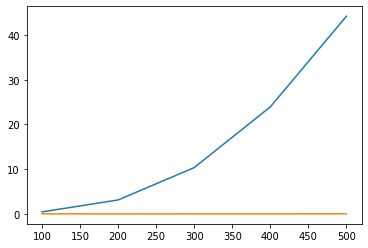

In [18]:
import matplotlib.pyplot as plt
n = [100, 200, 300, 400, 500]
MY_TIME = [0.4545931816101074, 3.1246068477630615,  10.357420682907104, 23.919661283493042, 44.17623853683472]
LINALG_TIME = [0.01874542236328125, 0.0036830902099609375, 0.010089874267578125, 0.015057086944580078, 0.026802539825439453]
plt.plot(n, MY_TIME)
plt.plot(n, LINALG_TIME)

In [39]:
#Cholesky method
import math
import numpy as np
import time

def cholesky(A):
    n = len(A)
    L = [[0.0] * n for i in range(n)]
    for i in range(n):
        for k in range(i + 1):
            tmp_sum = sum(L[i][j] * L[k][j] for j in range(k))
            if (i == k): 
                L[i][k] = math.sqrt(abs(A[i][i] - tmp_sum))
            else:
                L[i][k] = (1.0 / L[k][k] * (A[i][k] - tmp_sum))
    return L
n = 3
X = np.random.rand(n, n)
A = np.transpose(X) * X

for i in range(n):
    for j in range(n):
        if i != j:
            A[i][i] += A[i][j] 

L = A

L = A.dot(np.transpose(L))


my_time = time.time()
B = cholesky(L)
my_time = time.time() - my_time

print ("A:")
print(A)

print("Linalg:")
linalg_time = time.time()
print(np.linalg.cholesky(L))
linalg_time = time.time() - linalg_time

print ("L(Answer):")
print(B)

print("MY TIME:", my_time)
print("LINALG TIME:", linalg_time)

A:
[[0.88887501 0.05306055 0.08962094]
 [0.05306055 0.4138639  0.19828969]
 [0.08962094 0.19828969 0.87901556]]
Linalg:
[[0.89495593 0.         0.        ]
 [0.09709411 0.45165283 0.        ]
 [0.18879295 0.53755739 0.7038525 ]]
L(Answer):
[[0.8949559270845976, 0.0, 0.0], [0.09709410577889332, 0.4516528344365602, 0.0], [0.18879294520099682, 0.5375573855264107, 0.7038524987576734]]
MY TIME: 7.891654968261719e-05
LINALG TIME: 0.00024390220642089844


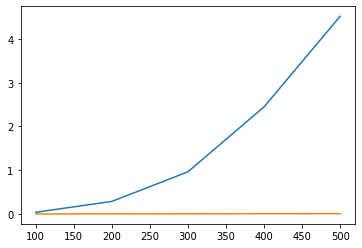

In [25]:
import matplotlib.pyplot as plt
n = [100, 200, 300, 400, 500]
MY_TIME = [0.03864097595214844, 0.28725266456604004, 0.9641067981719971, 2.4486637115478516, 4.5200841426849365]
LINALG_TIME = [0.001354217529296875, 0.0017931461334228516,  0.0028612613677978516, 0.007332801818847656, 0.007010459899902344]
plt.plot(n, MY_TIME)
plt.plot(n, LINALG_TIME)

In [6]:
#sweep method
import numpy as np
from scipy.linalg import solve_banded
import time

def sweep ( a, b, c, f, n):
    alpha = (n + 1) * [0]
    beta = (n + 1) * [0]
    x = np.random.rand(n)
    a[0] = 0
    c[n -  1] = 0
    alpha[0] = 0
    beta[0] = 0
    for i in range(0, n):  
        d = float(a[i] * alpha[i] + b[i])
        alpha [i + 1] = float(-c[i] / d)
        
        beta [i + 1] = float((f[i] - (a[i] * beta[i])) / (d))
    x[n - 1] = float(beta[n])
    for i in range(n - 2, -1, -1):
        x[i] = float(alpha[i + 1] * x[i + 1] + beta[i + 1])
    return x

n = int(input()) 

a = np.random.rand(n)
a[0] = 0
b = np.random.rand(n)
c = np.random.rand(n)
c[n - 1] = 0
for i in range(n):
    b[i] += a[i] + b[i]

f = np.random.rand(n)
a_linalg = np.array([0] + c[:-1].tolist())
b_linalg = b
c_linalg = np.array(a[1:].tolist() + [0])
A = np.array([a_linalg, b_linalg, c_linalg])
my_time = time.time()
print("My alg:", sweep(a, b, c, f, n))
my_time = time.time() - my_time
linalg_time = time.time()
print("Linalg:", solve_banded((1, 1), A, f))
linalg_time = time.time() - linalg_time
print("My time:", my_time)
print("Linalg time:", linalg_time)

500000
My alg: [ 4.89873009 -5.75147432  2.85561182 ...  2.36926014 -1.19821953
  1.94322731]
Linalg: [ 4.89873009 -5.75147432  2.85561182 ...  2.36926014 -1.19821953
  1.94322731]
My time: 1.0396592617034912
Linalg time: 0.015249490737915039


### 

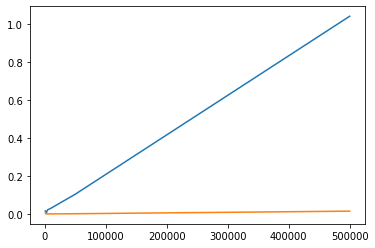

In [7]:
import matplotlib.pyplot as plt
n = [1000, 2000, 3000, 4000, 5000, 10000, 50000, 500000]
MY_TIME = [ 0.016228914260864258,  0.009568214416503906, 0.006544589996337891,  0.017900705337524414, 0.022501468658447266, 0.030068635940551758, 0.10403275489807129, 1.0396592617034912]
LINALG_TIME = [ 0.008415937423706055, 0.0007710456848144531, 0.0007398128509521484, 0.0007770061492919922, 0.0007781982421875,  0.0007214546203613281, 0.0017018318176269531, 0.015249490737915039]
plt.plot(n, MY_TIME)
plt.plot(n, LINALG_TIME)
